In [5]:
#1. Import Libraries\

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# creating and empty DataFrame:
df = pd.DataFrame()

# loading a CSV file from local device and store it in a pandas DataFrame:
df = pd.read_csv('global-data-on-sustainable-energy.csv')

In [14]:
#df[0::19] # we Only have 19 countries with a full list and no missing values, this is an issue, So lets see how many missing values we actually have

# View variable characteristics (number of null values, data names, data types)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [ ]:
#code here


<h1>Feature transformations</h1>
<h4>In this section we will transform the NaN or null features and try different values to achieve a better result</h4>

In [40]:
#Get mean values for whole table ignoring NaN values


access = df["Access to electricity (% of population)"]
print(np.nanmean(access))
print("access nanmean = ",np.nanmean(access))
print("access mean = ",np.mean(access))
access

78.93370216207748
access nanmean =  78.93370216207748
access mean =  78.93370216207748


0        1.613591
1        4.074574
2        9.409158
3       14.738506
4       20.064968
          ...    
3644    42.561730
3645    44.178635
3646    45.572647
3647    46.781475
3648    52.747670
Name: Access to electricity (% of population), Length: 3649, dtype: float64

In [36]:
#Get mean values for whole table ignoring NaN values


renewPerCapita = df["Renewable-electricity-generating-capacity-per-capita"]
print("renewPerCapita nanmean = ",np.nanmean(renewPerCapita))
print("renewPerCapita mean = ",np.mean(renewPerCapita))
renewPerCapita

 

renewPerCapita nanmean =  113.13749816041205
renewPerCapita mean =  113.13749816041205


0        9.22
1        8.86
2        8.47
3        8.09
4        7.75
        ...  
3644    62.88
3645    62.33
3646    82.53
3647    81.40
3648    80.61
Name: Renewable-electricity-generating-capacity-per-capita, Length: 3649, dtype: float64

In [49]:
pd.options.display.float_format = '{:,.3f}'.format

val = df.mean(axis=0,numeric_only=True,skipna=True)
val

#these are the avg values for each column


Year                                                                    2,010.038
Access to electricity (% of population)                                    78.934
Access to clean fuels for cooking                                          63.255
Renewable-electricity-generating-capacity-per-capita                      113.137
Financial flows to developing countries (US $)                     94,224,000.000
Renewable energy share in the total final energy consumption (%)           32.638
Electricity from fossil fuels (TWh)                                        70.365
Electricity from nuclear (TWh)                                             13.450
Electricity from renewables (TWh)                                          23.968
Low-carbon electricity (% electricity)                                     36.801
Primary energy consumption per capita (kWh/person)                     25,743.982
Energy intensity level of primary energy (MJ/$2017 PPP GDP)                 5.307
Value_co2_emissi

In [52]:
#lets fill the nan values with average values for each column

df_filled_with_averages = df.fillna(df.mean())

print(df_filled_with_averages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3649 non-null   float64
 3   Access to clean fuels for cooking                                 3649 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3649 non-null   float64
 7   Electricity from fossil fuels (TW

C:\Users\Surface\AppData\Local\Temp\ipykernel_631072\2489947689.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_with_averages = df.fillna(df.mean())


<h1>Messing with DF tables of country</h1>

In [16]:
df_list = [d for _, d in df.groupby(['Entity'])]#separate values by country into their own smaller tables

C:\Users\Surface\AppData\Local\Temp\ipykernel_631072\1217132406.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df_list = [d for _, d in df.groupby(['Entity'])]#separate values by country into their own smaller tables


In [17]:
test_df = pd.DataFrame()

for i in range(len(df_list)):
    test_df = pd.concat([test_df, df_list[i].head(1)], ignore_index = True)
    test_df.reset_index()
    #test_df = df_list[i].head(1)



In [18]:
test_df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.640000,760.0,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Albania,2000,100.000000,38.2,NaN,NaN,NaN,0.14,0.0,4.55,...,9029.43750,4.130000,3170.0,NaN,6.946217,1126.683340,105,28748.0,41.153332,20.168331
2,Algeria,2000,98.973100,97.1,8.91,NaN,0.43,23.84,0.0,0.05,...,9746.52400,4.180000,80050.0,0.053235,3.800000,1765.027146,18,2381741.0,28.033886,1.659626
3,Angola,2000,24.212744,41.1,14.37,NaN,73.44,0.50,0.0,0.90,...,1979.25620,3.680000,16200.0,NaN,3.054624,556.838632,26,1246700.0,-11.202692,17.873887
4,Antigua and Barbuda,2000,97.689260,100.0,0.00,NaN,0.00,0.14,0.0,0.00,...,28457.22300,3.130000,330.0,NaN,6.203431,10872.292950,223,443.0,17.060816,-61.796428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Uzbekistan,2000,99.593270,83.6,64.43,NaN,0.72,38.51,0.0,5.82,...,24053.54700,28.200000,123810.0,2.899541,3.835000,558.226802,79,447400.0,41.377491,64.585262
172,Vanuatu,2000,22.143080,15.9,3.24,NaN,48.65,0.04,0.0,0.00,...,1988.27890,3.660000,90.0,NaN,5.924809,1470.635870,25,12189.0,-15.376706,166.959158
173,Yemen,2000,49.187256,55.7,0.00,1480000.0,0.95,3.21,0.0,0.00,...,3228.21040,2.823132,NaN,NaN,NaN,NaN,56,527968.0,15.552727,48.516388
174,Zambia,2000,16.700000,13.8,173.03,10000.0,89.98,0.07,0.0,7.69,...,2951.36720,12.770000,1810.0,NaN,3.897323,345.689621,25,752618.0,-13.133897,27.849332


In [24]:
feature_cols = ['Entity', 'Year', 'Renewable energy share in the total final energy consumption (%)']

algeria = df_list[2]
algeria


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
42,Algeria,2000,98.973100,97.1,8.91,NaN,0.43,23.84,0.0,0.05,...,9746.524,4.18,80050.00000,0.053235,3.8,1765.027146,18,2381741.0,28.033886,1.659626
43,Algeria,2001,98.966870,97.3,8.79,810000.0,0.43,24.96,0.0,0.07,...,9961.640,4.07,78650.00000,0.065218,3.0,1740.606654,18,2381741.0,28.033886,1.659626
44,Algeria,2002,98.953060,97.8,8.68,310000.0,0.51,25.94,0.0,0.06,...,10180.350,4.12,82400.00153,0.051677,5.6,1781.828908,18,2381741.0,28.033886,1.659626
45,Algeria,2003,98.934010,98.0,8.57,90000.0,0.47,27.54,0.0,0.26,...,10510.461,4.08,88190.00244,0.228104,7.2,2103.381291,18,2381741.0,28.033886,1.659626
46,Algeria,2004,98.912080,98.2,8.46,140000.0,0.44,29.14,0.0,0.25,...,10759.022,3.96,89489.99786,0.206787,4.3,2610.185422,18,2381741.0,28.033886,1.659626
47,Algeria,2005,98.889610,98.5,8.34,160000.0,0.58,31.36,0.0,0.55,...,11113.723,3.90,94190.00244,0.434119,5.9,3113.094883,18,2381741.0,28.033886,1.659626
48,Algeria,2006,98.869010,98.7,7.42,NaN,0.41,32.90,0.0,0.22,...,11341.980,4.10,99809.99756,0.163272,1.7,3478.710002,18,2381741.0,28.033886,1.659626
49,Algeria,2007,98.852936,98.8,7.30,NaN,0.41,34.75,0.0,0.22,...,11759.701,4.21,102750.00000,0.159905,3.4,3950.512993,18,2381741.0,28.033886,1.659626
50,Algeria,2008,99.300000,99.0,6.64,NaN,0.30,37.55,0.0,0.28,...,12252.297,4.16,107750.00000,0.187754,2.4,4923.631615,18,2381741.0,28.033886,1.659626
51,Algeria,2009,98.845184,99.1,6.44,2190000.0,0.31,35.91,0.0,0.30,...,12753.120,4.48,112169.99820,0.212785,1.6,3883.270900,18,2381741.0,28.033886,1.659626


ValueError: x and y must have same first dimension, but have shapes (16,) and (1,)

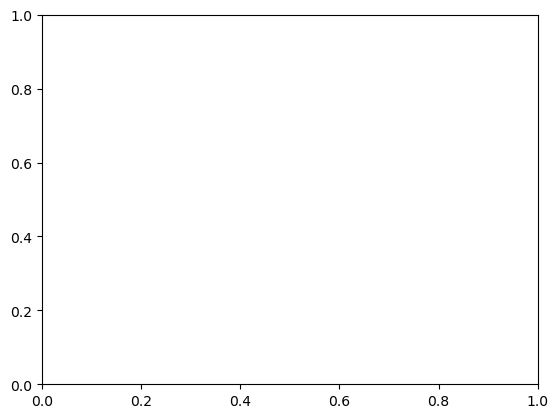

In [64]:
# Data for plotting
t = algeria["Year"]
s = 1

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()